<a href="https://colab.research.google.com/github/JanechrisDataAnalyst/JanechrisDataAnalyst/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

># Introduction:


We will build a linear regression model for medical cost dataset. The dataset consists of age, sex, BMI(bosy mass index), children, smoker and region features, which are independent and charge as a dependent feature. We will predict individual medical costs billed by health insurance.
The target outcome is the "Charge" which we will try topredict based on the given features.

># Import Library and Dataset

#Now we will import couple of python library required for our analysis and import dataset

In [ ]:
# Import library

import pandas as pd #Data manipulation
import numpy as np #Dtat manipulation
import matplotlib.pyplot as plt  # Visualization
import seaborn as sns # Visualization


In [ ]:
df = pd.read_csv("/content/insurance 2.csv")
df.head()

NameError: name 'pd' is not defined

># Data Exploration:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.shape

(1338, 7)

In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df.duplicated().sum()

1

In [ ]:
df.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df.duplicated().sum()

1

># EDA:

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

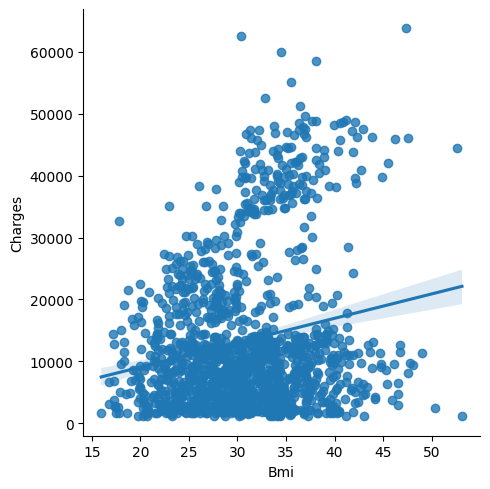

In [ ]:
# BMI & CHARGES

sns.lmplot(x="bmi", y="charges", data= df)
plt.xlabel("Bmi")
plt.ylabel("Charges")
plt.title = ("BMI VS CHARGES")

In [ ]:
df["children"].unique()

array([0, 1, 3, 2, 5, 4])

In [ ]:
df['children'].unique

<bound method Series.unique of 0       0
1       1
2       3
3       0
4       0
       ..
1333    3
1334    0
1335    0
1336    0
1337    0
Name: children, Length: 1338, dtype: int64>

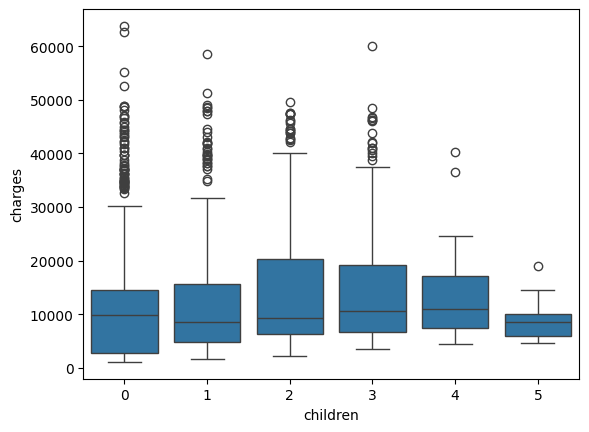

In [ ]:

sns.boxplot(x="children", y= "charges", data= df)
plt.title = (" Charges Vs Children")

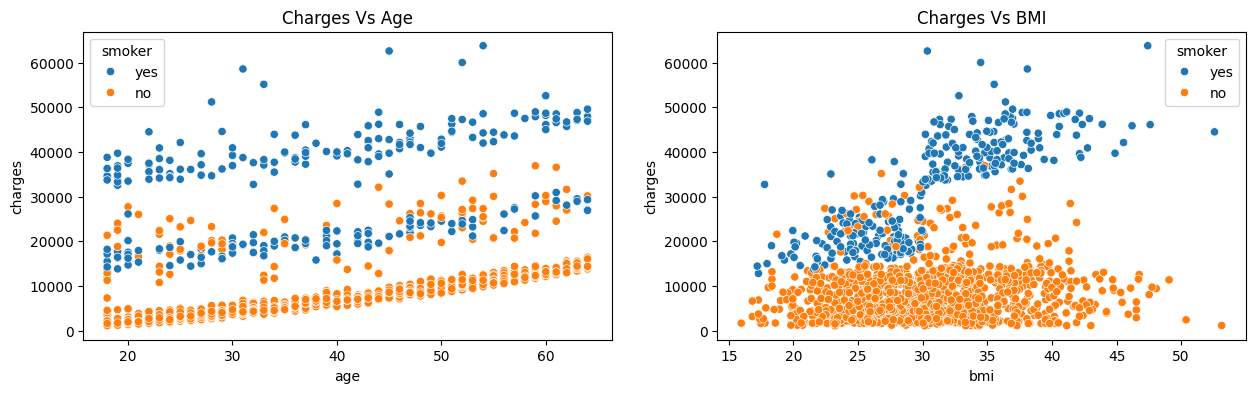

In [ ]:
figure,axs= plt.subplots(1,2, figsize =(15,4))
sns.scatterplot(x= "age", y= "charges", data= df, hue = "smoker", ax = axs[0])
axs[0].set_title("Charges Vs Age")

sns.scatterplot(x= "bmi", y= "charges", data= df, hue= "smoker", ax = axs[1])
axs[1].set_title("Charges Vs BMI")
plt.show()



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# dummmy function
categorical_columns = ["sex","smoker","region"]
df_encode = pd.get_dummies(data = df, prefix= "E",prefix_sep = "_",columns=categorical_columns,drop_first=True,dtype="int8")

In [ ]:
df_encode

,age,bmi,children,charges,E_male,E_yes,E_northwest,E_southeast,E_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [ ]:
df_encode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1338 non-null   int64  
 1   bmi          1338 non-null   float64
 2   children     1338 non-null   int64  
 3   charges      1338 non-null   float64
 4   E_male       1338 non-null   int8   
 5   E_yes        1338 non-null   int8   
 6   E_northwest  1338 non-null   int8   
 7   E_southeast  1338 non-null   int8   
 8   E_southwest  1338 non-null   int8   
dtypes: float64(2), int64(2), int8(5)
memory usage: 48.5 KB


># ML

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
# define features and tsrget
x = df_encode.drop("charges",axis=1) # Features
y = df_encode["charges"] # Target


In [ ]:
#splitting the data to train set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2,random_state= 23)

In [ ]:
x_train

,age,bmi,children,E_male,E_yes,E_northwest,E_southeast,E_southwest
708,31,30.495,3,0,0,0,0,0
45,55,37.300,0,1,0,0,0,1
434,31,28.595,1,1,0,1,0,0
995,39,23.275,3,0,0,0,0,0
1299,19,25.745,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...
31,18,26.315,0,0,0,0,0,0
950,57,18.335,0,1,0,0,0,0
1064,29,25.600,4,0,0,0,0,1
742,53,34.105,0,1,1,0,0,0


In [ ]:
y_train

708      6113.23105
45      20630.28351
434      4243.59005
995      7986.47525
1299     2710.82855
           ...     
31       2198.18985
950     11534.87265
1064     5708.86700
742     43254.41795
595      8823.98575
Name: charges, Length: 1070, dtype: float64

In [ ]:
x_train.shape

(1070, 8)

In [ ]:
x_test.shape

(268, 8)

In [ ]:
y_train.shape

(1070,)

In [ ]:
y_test.shape

(268,)

In [ ]:
# create the model:
model = LinearRegression()

# fit the model to the training data:
model.fit(x_train, y_train)

# make predictions for the test set:
y_pred = model.predict(x_test)

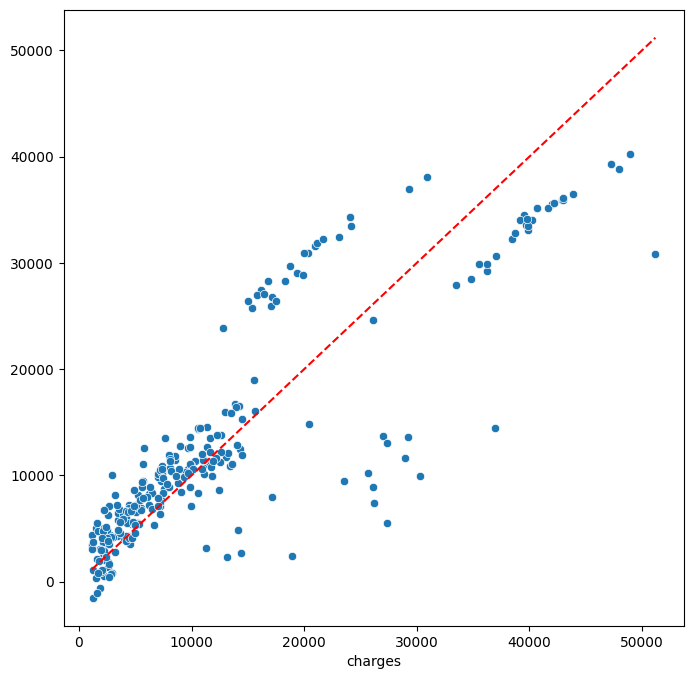

In [ ]:
# Visualize it
plt.figure(figsize = (8,8))
sns.scatterplot( x = y_test, y = y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test),max(y_test)],"--",color = "red")

In [ ]:
df_encode.columns

Index(['age', 'bmi', 'children', 'charges', 'E_male', 'E_yes', 'E_northwest',
       'E_southeast', 'E_southwest'],
      dtype='object')

In [ ]:
# use the model for making new prediction
new_data = pd.DataFrame({"age":[25], "bmi":[20], "children":[3],'E_male':[1], 'E_yes': [0],'E_northwest':[1],'E_southeast':[0],'E_southwest':[0]})

In [ ]:
Prediction = model.predict(new_data)
print(f"The predicted charges for this new person is: {Prediction[0]}")

The predicted charges for this new person is: 2505.7138429249353


In [ ]:
#Evaluating our ML Model
from sklearn.metrics import mean_absolute_error

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error:", (mae))


Mean Absolute Error: 3991.2037935136573


In [ ]:
#Evaluating our ML Model
from sklearn.metrics import mean_squared_error

# Calculate the Mean Square Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Square Error:", mse)

Mean Square Error: 34652052.879408464


In [ ]:
# Calculating the Root Mean Squared Error
mse = np.sqrt(mean_squared_error(y_test, y_pred))
print("The Root Mean Squared Error is :", mse)

The Root Mean Squared Error is : 5886.599432559384


In [ ]:
# Calculating the Root Mean Squared Logarithm Error
rmsle = np.log(np.sqrt(mean_squared_error(y_test, y_pred)))
print("Root Mean S quared Log Error is :", rmsle)

Root Mean S quared Log Error is : 8.680433764002089


In [ ]:
rmsle = np.log(np.sqrt(mean_squared_error(y_test, y_pred)))
print(rmsle)

8.680433764002089


In [ ]:
# Calculating the R Squared (R2) Score
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("r2_score is:", r2)

r2_score is: 0.7536440382001555


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

0.7536440382001555


In [ ]:
# Calculating the Adjusted R2
n = len(df)
k = x.shape[1]
adjusted_r_squared = 1-((1-r2)*(n-1)/(n-k-1))
print("Adjusted R-Squared is:", adjusted_r_squared)

Adjusted R-Squared is: 0.7521610828243851
